In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


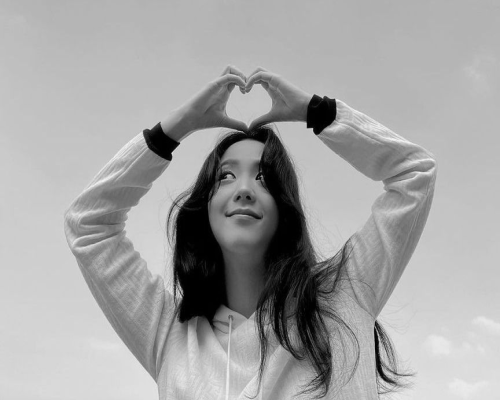

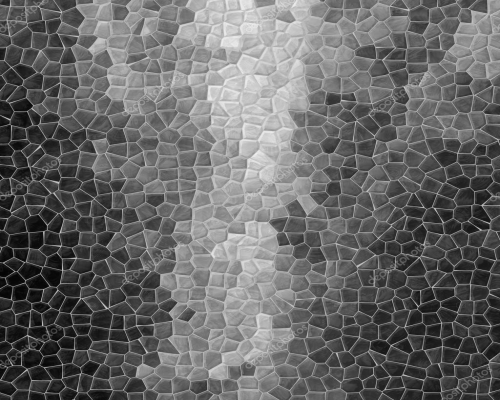

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd
import seaborn as sns

img = cv2.imread('/content/drive/MyDrive/Kuliah/3139316400.jpg')
img1 = cv2.imread('/content/drive/MyDrive/Kuliah/depositphotos_110415638-stock-photo-mosaic-striped-full-color-rainbow.jpg')
dim = (500, 400)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
img1 = cv2.resize(img1, dim, interpolation = cv2.INTER_AREA)

# main()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY);
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY);
# cv2_imshow(img)
cv2_imshow(img)

cv2_imshow(img1)

In [ ]:
# histr_gray = cv2.calcHist([cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)],[],None,[256],[0,256])
hist = pd.DataFrame(cv2.calcHist([img], [0], None, [256], [0, 255]))
hist1 = pd.DataFrame(cv2.calcHist([img1], [0], None, [256], [0, 255]))


Fungsi membagi level berdasarkan standar deviasi 


In [ ]:
std = []
x_index = []
y_index = []
def level(data,std,x,y):
  x=0
  y=1
  while (y != len(data[0])-1):
    #data[0].loc[x:y].std()
    if(data[0].loc[x:y].std() > 0.6 * data[0].std() ):  
      y = y-1
      std.append(data[0].loc[x:y].std())
      #print(x,y,1,std)
      x_index.append(x)
      y_index.append(y)
      x = y+1
      y += 3
    elif(data[0].loc[x:y].std() <= 0.6 * data[0].std()):
      #print(x,y,2)
      y+=1
    

    if(y == len(data[0])-1):
      std.append(data[0].loc[x:y].std())
      x_index.append(x)
      y_index.append(y)
 
      
level(hist,std,x_index,y_index)
df_histrg = pd.DataFrame(list(zip(std, x_index,y_index)),
               columns =['std', 'x_index','y_index'])
df_histrg['std'] = df_histrg['std'].fillna(0)
df_histrg



,std,x_index,y_index
0,521.137695,0,1
1,624.277527,2,180
2,5861.915039,181,182
3,743.285339,183,188
4,1360.473389,189,190
5,248.901581,191,192
6,946.108887,193,194
7,35.355339,195,196
8,721.801636,197,226
9,67.190346,227,255


In [ ]:
std = []
x_index = []
y_index = []
level(hist1,std,x_index,y_index)
df_histrg1 = pd.DataFrame(list(zip(std, x_index,y_index)),
               columns =['std', 'x_index','y_index'])
df_histrg1['std'] = df_histrg1['std'].fillna(0)
df_histrg1


,std,x_index,y_index
0,287.016998,0,32
1,295.133423,33,204
2,90.973816,205,255


Histogram GrayScale dari setiap gambar sebelum di quantisasi

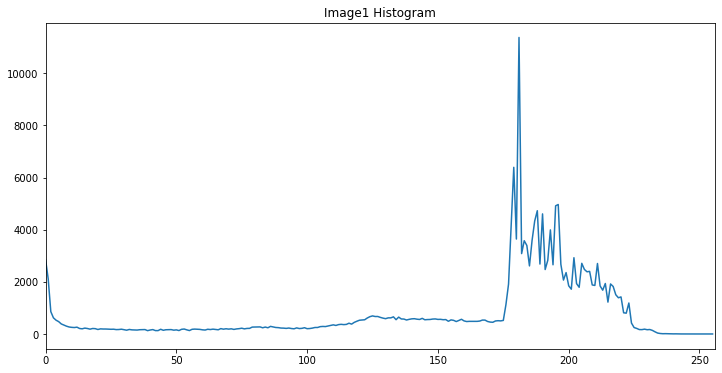

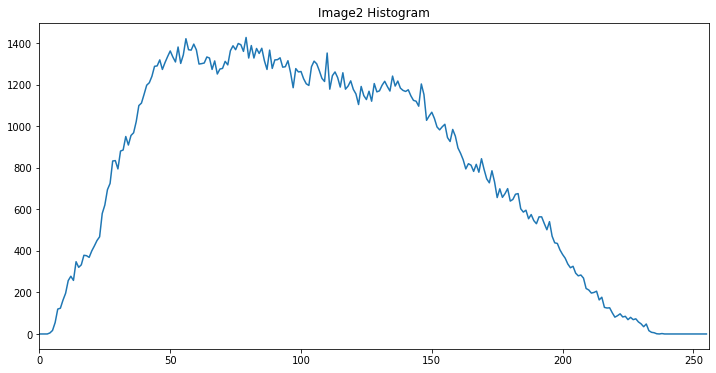

In [ ]:
histo = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.figure(1, figsize=(12,6))
plt.title("Image1 Histogram")
plt.plot(hist)
plt.xlim([0,256])

histo1 = cv2.calcHist([img1], [0], None, [256], [0, 255])
plt.figure(2,figsize=(12,6))
plt.title("Image2 Histogram")
plt.plot(hist1)
plt.xlim([0,256])
plt.show()

In [ ]:
means = []
def ubah(level,data,mean):  
  for i in level.index:
    rata = data.loc[level['x_index'].loc[i]:level['y_index'].loc[i]].mean()
    means.append(rata)
  return mean
  
means = ubah(df_histrg1,hist1, means)


In [ ]:
rata_fix = [int(x) for x in means]
rata_fix = np.array(rata_fix)
rata_fix = rata_fix.astype(int)

df_histrg1['mean'] = rata_fix


In [ ]:
means = []
means = ubah(df_histrg, hist,means)
means
rata_fix1 = [int(x) for x in means]
rata_fix1 = np.array(rata_fix1)
rata_fix1 = rata_fix1.astype(int)
df_histrg['mean'] = rata_fix1
df_histrg

,std,x_index,y_index,mean
0,521.137695,0,1,2482
1,624.277527,2,180,424
2,5861.915039,181,182,7228
3,743.285339,183,188,3705
4,1360.473389,189,190,3644
5,248.901581,191,192,2648
6,946.108887,193,194,3323
7,35.355339,195,196,4941
8,721.801636,197,226,1738
9,67.190346,227,255,40


In [ ]:
df_histrg1

,std,x_index,y_index,mean
0,287.016998,0,32,369
1,295.133423,33,204,1069
2,90.973816,205,255,77


Function memasukan hasil 

In [ ]:
def assign(image,fix):
  for i in range(len(image)) :
    for j in range(len(image[i])) :
      for k in fix.index :
        if (fix['x_index'].loc[k] <= image[i][j] <= fix['y_index'].loc[k]):
          image[i][j] = fix['mean'].loc[k]
          break
  return image

img = assign(img,df_histrg)        
  

In [ ]:
img1 = assign(img1,df_histrg1)  

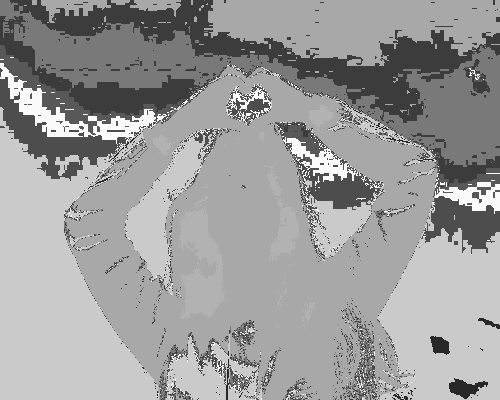

In [ ]:
cv2_imshow(img)

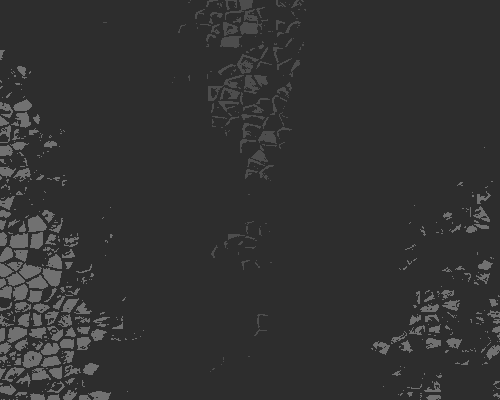

In [ ]:
cv2_imshow(img1)

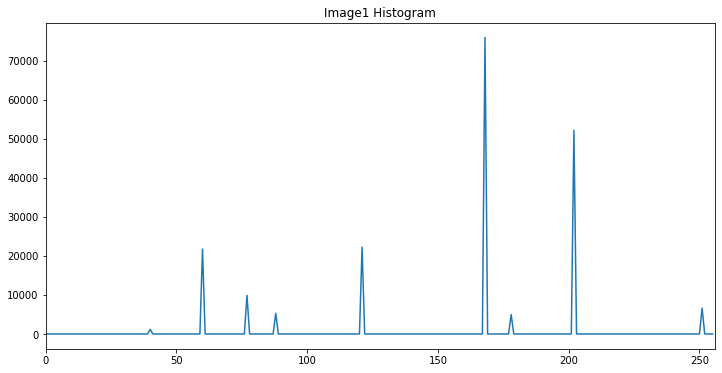

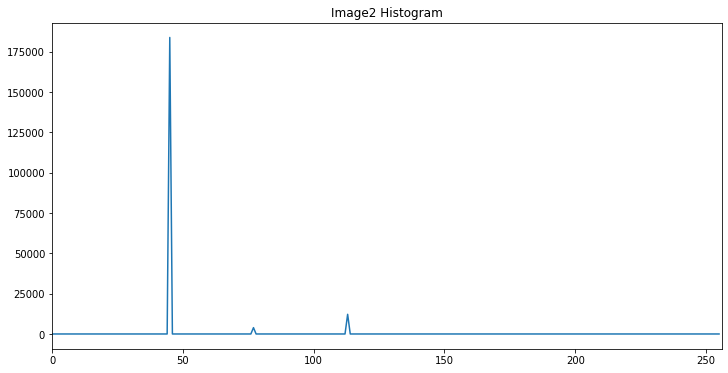

In [ ]:
histog = cv2.calcHist([img], [0], None, [256], [0, 255])
plt.figure(figsize=(12,6))
plt.figure(1)
plt.title("Image1 Histogram")
plt.plot(histog)
plt.xlim([0,256])

histog1 = cv2.calcHist([img1], [0], None, [256], [0, 255])
plt.figure(2,figsize=(12,6))
plt.title("Image2 Histogram")
plt.plot(histog1)
plt.xlim([0,256])
plt.show()